# Introdução

Atividade produzida para a disciplina EBM116 – Tópicos Avançados em Imagens Médicas do programa de pós-graduação em Engenharia Biomédica da Universidade Federal do ABC (UFABC). O objetivo da atividade foi explorar diferentes técnicas de filtragem.

Autor: Leonardo Alves Ferreira

# Sumário

1. Filtragem Espacial <br>
    1.1 [Correlação e Convolução](#ex1) <br>
    1.2 [Filtros Gaussiano, de Mediana e Bilateral](#ex2) <br>
2. Filtragem no Domínio da Frequência <br>
    2.1 [Filtros Sobel e Passa Baixa ideal](#ex3) <br>
    2.2 [Filtragem de uma Imagem de Escolha](#ex4) <br>

# Filtragem Espacial

## Correlação e Convolução <a name="ex1"></a>

Iremos analisar as operações de correlação e convulção em uma matriz genérica v.

In [3]:
# Bibliotecas necessárias ao longo deste notebook
import numpy as np
from scipy import ndimage # Biblioteca que implementa as funções de correlação e convolução

v = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(f"A matriz v é: \n {v} \n")

v_corr = ndimage.correlate(v,v,mode='constant', cval=0)
print(f"O resultado da correlação de v com v é: \n {v_corr} \n")
v_conv = ndimage.convolve(v,v,mode='constant', cval=0)
print(f"O resultado da convolução de v com v é: \n {v_conv} \n")

A matriz v é: 
 [[1 2 3]
 [4 5 6]
 [7 8 9]] 

O resultado da correlação de v com v é: 
 [[ 94 154 106]
 [186 285 186]
 [106 154  94]] 

O resultado da convolução de v com v é: 
 [[ 26  56  54]
 [ 84 165 144]
 [134 236 186]] 



Um exemplo de como a correlação é calculada é apresentado na imagem a seguir (elaborada pelo autor). Nela, a região em cinza é onde foi feito o padding de zero, os números em vermelho são os valores da matriz do filtro, e o pixel em verde é o que está sendo calculado no passo apresentado.

<img src="filtragem_corr.png" width="300">

Portanto, o valor do primeiro elemento da matriz resultante é dado por:

1x0+2x0+3x0+4x0+5x1+6x2+7x0+8x4+9x5 = 94,

como calculado pela função do scipy. O cálculo dos outros elementos são obtidos de forma semelhante deslocando a matriz pelos próximos elementos da imagem:

In [4]:
print(f"(0,0): 1x0+2x0+3x0+4x0+5x1+6x2+7x0+8x4+9x5 = {5*1+6*2+8*4+9*5}")
print(f"(0,1): 1x0+2x0+3x0+4x1+5x2+6x3+7x4+8x5+9x6 = {4*1+5*2+6*3+7*4+8*5+9*6}")
print(f"(0,2): 1x0+2x0+3x0+4x2+5x3+6x0+7x5+8x6+9x0 = {4*2+5*3+7*5+8*6}")
print(f"(1,0): 1x0+2x1+3x2+4x0+5x4+6x5+7x0+8x7+9x8 = {2*1+3*2+5*4+6*5+8*7+9*8}")
print(f"(1,1): 1x1+2x2+3x3+4x4+5x5+6x6+7x7+8x8+9x9 = {1*1+2*2+3*3+4*4+5*5+6*6+7*7+8*8+9*9}")
print(f"(1,2): 1x2+2x3+3x0+4x5+5x6+6x0+7x8+8x9+9x0 = {1*2+2*3+4*5+5*6+7*8+8*9}")
print(f"(2,0): 1x0+2x4+3x5+4x0+5x7+6x8+7x0+8x0+9x0 = {2*4+3*5+5*7+6*8}")
print(f"(2,1): 1x4+2x5+3x6+4x7+5x8+6x9+7x0+8x0+9x0 = {1*4+2*5+3*6+4*7+5*8+6*9}")
print(f"(2,2): 1x5+2x6+3x0+4x8+5x9+6x0+7x0+8x0+9x0 = {1*5+2*6+4*8+5*9}")

(0,0): 1x0+2x0+3x0+4x0+5x1+6x2+7x0+8x4+9x5 = 94
(0,1): 1x0+2x0+3x0+4x1+5x2+6x3+7x4+8x5+9x6 = 154
(0,2): 1x0+2x0+3x0+4x2+5x3+6x0+7x5+8x6+9x0 = 106
(1,0): 1x0+2x1+3x2+4x0+5x4+6x5+7x0+8x7+9x8 = 186
(1,1): 1x1+2x2+3x3+4x4+5x5+6x6+7x7+8x8+9x9 = 285
(1,2): 1x2+2x3+3x0+4x5+5x6+6x0+7x8+8x9+9x0 = 186
(2,0): 1x0+2x4+3x5+4x0+5x7+6x8+7x0+8x0+9x0 = 106
(2,1): 1x4+2x5+3x6+4x7+5x8+6x9+7x0+8x0+9x0 = 154
(2,2): 1x5+2x6+3x0+4x8+5x9+6x0+7x0+8x0+9x0 = 94


A convolução pode ser calculada de forma semelhante, porém com a matriz do filtro sendo invertida horizontalmente e verticalmente, como apresentado na imagem a seguir (elaborada pelo autor).

<img src="filtragem_convolve.png" width="300">

Os cálculos também são feitos de forma semelhante:

In [5]:
print(f"(0,0): 9x0+8x0+7x0+6x0+5x1+4x2+3x0+2x4+1x5 = {5*1+4*2+2*4+1*5}")
print(f"(0,1): 9x0+8x0+7x0+6x1+5x2+4x3+3x4+2x5+1x6 = {6*1+5*2+4*3+3*4+2*5+1*6}")
print(f"(0,2): 9x0+8x0+7x0+6x2+5x3+4x0+3x5+2x6+1x0 = {6*2+5*3+3*5+2*6}")
print(f"(1,0): 9x0+8x1+7x2+6x0+5x4+4x5+3x0+2x7+1x8 = {8*1+7*2+5*4+4*5+2*7+1*8}")
print(f"(1,1): 9x1+8x2+7x3+6x4+5x5+4x6+3x7+2x8+1x9 = {9*1+8*2+7*3+6*4+5*5+4*6+3*7+2*8+1*9}")
print(f"(1,2): 9x2+8x3+7x0+6x5+5x6+4x0+3x8+2x9+1x0 = {9*2+8*3+6*5+5*6+3*8+2*9}")
print(f"(2,0): 9x0+8x4+7x5+6x0+5x7+4x8+3x0+2x0+1x0 = {8*4+7*5+5*7+4*8}")
print(f"(2,1): 9x4+8x5+7x6+6x7+5x8+4x9+3x0+2x0+1x0 = {9*4+8*5+7*6+6*7+5*8+4*9}")
print(f"(2,2): 9x5+8x6+7x0+6x8+5x9+4x0+3x0+2x0+1x0 = {9*5+8*6+6*8+5*9}")

(0,0): 9x0+8x0+7x0+6x0+5x1+4x2+3x0+2x4+1x5 = 26
(0,1): 9x0+8x0+7x0+6x1+5x2+4x3+3x4+2x5+1x6 = 56
(0,2): 9x0+8x0+7x0+6x2+5x3+4x0+3x5+2x6+1x0 = 54
(1,0): 9x0+8x1+7x2+6x0+5x4+4x5+3x0+2x7+1x8 = 84
(1,1): 9x1+8x2+7x3+6x4+5x5+4x6+3x7+2x8+1x9 = 165
(1,2): 9x2+8x3+7x0+6x5+5x6+4x0+3x8+2x9+1x0 = 144
(2,0): 9x0+8x4+7x5+6x0+5x7+4x8+3x0+2x0+1x0 = 134
(2,1): 9x4+8x5+7x6+6x7+5x8+4x9+3x0+2x0+1x0 = 236
(2,2): 9x5+8x6+7x0+6x8+5x9+4x0+3x0+2x0+1x0 = 186


A função [convolve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html) possui alguns parâmetros que podem ser alterados para obter uma resposta diferente:
- mode: altera o tipo de padding que é feito.
- cval: quando mode é 'constant', determina o valor que é usado para o padding.
- origin: determina a posição do elemento que será usado como origem nos cálculos (pixel verde nas imagens acima).

No caso do mode, podemos alterá-lo para 'reflect', que faz o padding refletindo a matriz original em relação à aresta do último píxel; 'nearest', que faz o padding considerando o elemento mais próximo; 'mirror', que faz o padding refletindo a matriz original em relação ao último píxel; e 'wrap', que faz o padding duplicando a matriz original.

Dessa forma, com essas mudanças os cálculos resultam em valores diferentes. Exemplos de resultados com cada um desses são apresentados a seguir:

In [6]:
v_conv = ndimage.convolve(v,v,mode='constant', cval=2)
print(f"O resultado da convolução com mode='constant' e cval=2: \n {v_conv} \n")

v_conv = ndimage.convolve(v,v,mode='reflect')
print(f"O resultado da convolução com mode='reflect': \n {v_conv} \n")

v_conv = ndimage.convolve(v,v,mode='nearest')
print(f"O resultado da convolução com mode='nearest': \n {v_conv} \n")

v_conv = ndimage.convolve(v,v,mode='mirror')
print(f"O resultado da convolução com mode='mirror': \n {v_conv} \n")

v_conv = ndimage.convolve(v,v,mode='wrap')
print(f"O resultado da convolução com mode='wrap': \n {v_conv} \n")

O resultado da convolução com mode='constant' e cval=2: 
 [[ 92 104 112]
 [120 165 168]
 [176 248 220]] 

O resultado da convolução com mode='reflect': 
 [[ 75 102 135]
 [138 165 198]
 [255 282 315]] 

O resultado da convolução com mode='nearest': 
 [[ 75 102 135]
 [138 165 198]
 [255 282 315]] 

O resultado da convolução com mode='mirror': 
 [[165 174 195]
 [156 165 186]
 [255 264 285]] 

O resultado da convolução com mode='wrap': 
 [[255 246 255]
 [174 165 174]
 [255 246 255]] 



Um ponto comum entre todos os resultados é o pixel no centro (165), que não é alterado. Isso porque o seu cálculo só utiliza valores da imagem, não envolvendo os valores externos obtidos com o padding. Dessa forma, esse é um parâmetro que vai afetar somente o resultado das bordas da imagem que desejamos filtrar. A quantidade de pixels afetados na borda vai depender das dimensões do kernel do filtro.

Já o parâmetro 'origin' afeta o resultado na imagem inteira. Quando (0,0), o píxel central é considerado como origem. Valores diferentes indicam um deslocamento do píxel de origem no eixo em questão. Colocando-o como (1,-1), por exemplo, a origem fica sendo o elemento 1 elemento à direita e 1 acima do centro. Com isso, o resultado é alterado:

In [7]:
v_conv = ndimage.convolve(v,v,mode='constant',cval=0,origin=(1,-1))
print(f"O resultado da convolução com origin=(1,-1): \n {v_conv} \n")

O resultado da convolução com origin=(1,-1): 
 [[ 30  84 165]
 [ 56 134 236]
 [ 49 112 190]] 



## Filtros Gaussiano, de Mediana e Bilateral <a name="ex2"></a>

Para aplicar os filtros Gaussiano, de Mediana e Bilateral, iremos utilizar uma imagem do cérebro, obtida do <a href="https://www.cancerimagingarchive.net">Cancer Image Archive</a>. A imagem é importada e apresentada a seguir.

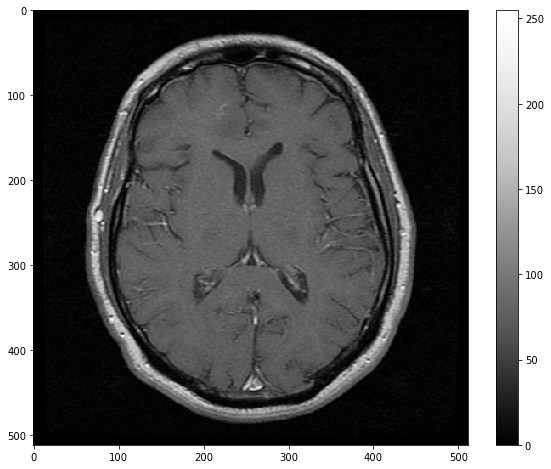

In [9]:
import pydicom as pdc
import matplotlib.pyplot as plt
import numpy as np

path="Brain_MRI/1-13.dcm"
Im=pdc.dcmread(path)
Im=Im.pixel_array

# Normalizar a imagem entre 0 e 255 (necessário para o filtro bilateral)
Im=Im.astype(np.float64)
Im=Im/np.max(Im)
Im=Im*255
Im=Im.astype(np.uint8)

color_map="Greys_r" # Mapa de cores em preto e branco
plt.rcParams['figure.figsize'] = [10, 8] # Ajustar o tamanho da figura

plt.imshow(Im,cmap=color_map)
plt.colorbar();

A seguir, são apresentadas algumas regiões ampliadas da imagem que seram analisadas conforme os filtros forem aplicados.

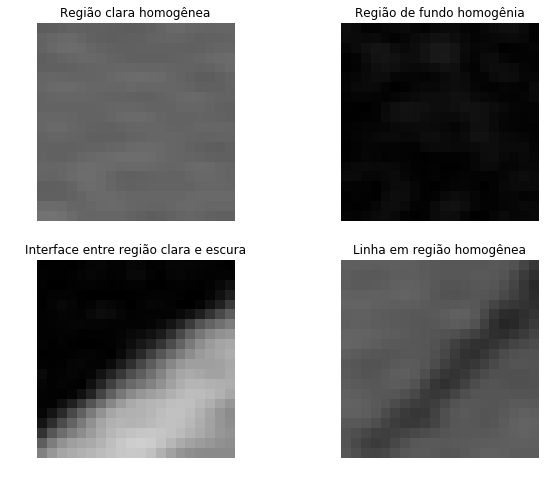

In [10]:
# Descobrir os valores máximo e mínimo da imagem para manter a mesma escala de cinza
val_max=np.max(Im)
val_min=np.min(Im)

plt.subplot(2,2,1);
plt.imshow(Im[210:230,190:210],cmap=color_map,vmin=val_min,vmax=val_max);
plt.title("Região clara homogênea");
plt.axis("off");

plt.subplot(2,2,2);
plt.imshow(Im[250:270,480:500],cmap=color_map,vmin=val_min,vmax=val_max);
plt.title("Região de fundo homogênia");
plt.axis("off");

plt.subplot(2,2,3);
plt.imshow(Im[45:65,140:160],cmap=color_map,vmin=val_min,vmax=val_max);
plt.title("Interface entre região clara e escura");
plt.axis("off");

plt.subplot(2,2,4);
plt.imshow(Im[105:125,325:345],cmap=color_map,vmin=val_min,vmax=val_max);
plt.title("Linha em região homogênea");
plt.axis("off");

Observando as regiões ampliadas, é possível notar a presença de ruídos que fazem com que regiões homogêneas não sejam deviademente uniformes, o que poderia atrapalhar a realização de análises ou a aplicação de outras técnicas, como a segmentação automática. Para corrigir isso, a aplicação de filtros pode ser utilizada. Os filtros gaussiano, de mediana e bilateral são aplicados e apresentados a seguir.

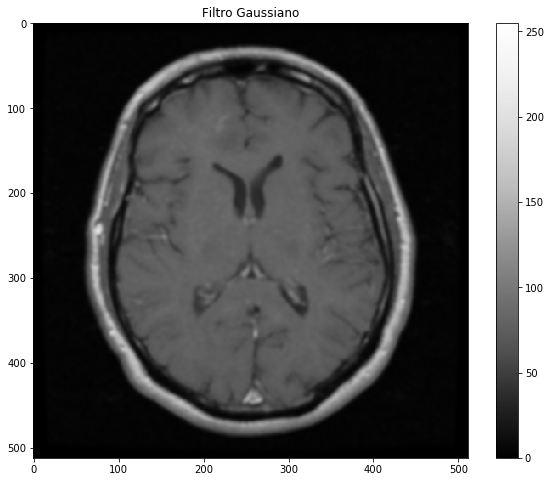

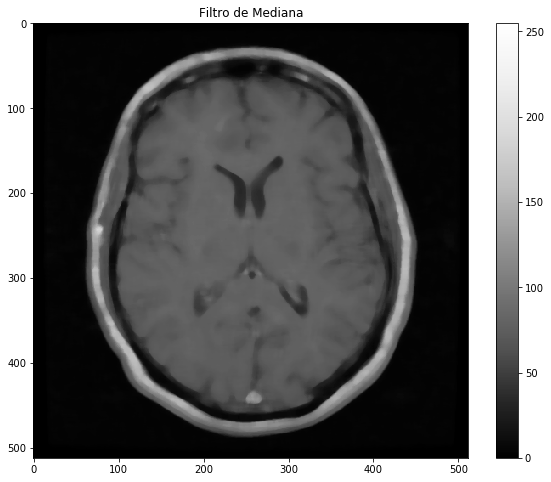

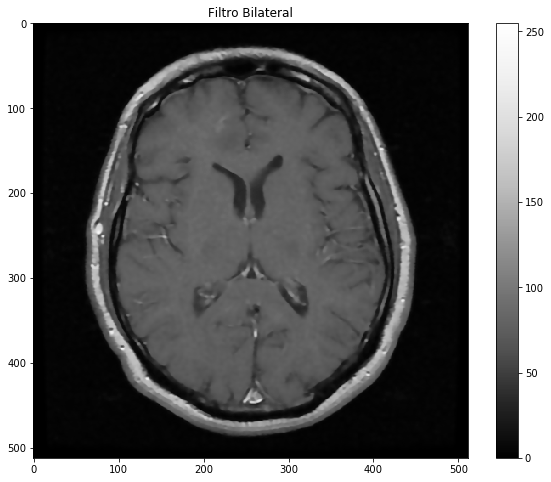

In [11]:
import cv2

Im_gauss=cv2.GaussianBlur(Im,(9,9),2)
Im_mediana=ndimage.median_filter(Im,size=10)
Im_bilateral=cv2.bilateralFilter(Im, 6, 20, 20) 

plt.imshow(Im_gauss,cmap=color_map,vmin=val_min,vmax=val_max);
plt.title("Filtro Gaussiano");
plt.colorbar();
plt.show();

plt.imshow(Im_mediana,cmap=color_map,vmin=val_min,vmax=val_max);
plt.title("Filtro de Mediana");
plt.colorbar();
plt.show();

plt.imshow(Im_bilateral,cmap=color_map,vmin=val_min,vmax=val_max);
plt.title("Filtro Bilateral");
plt.colorbar();
plt.show();

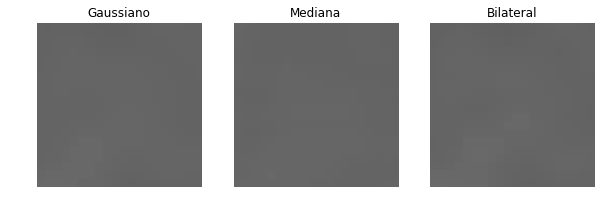

In [12]:
plt.subplot(1,3,1);
plt.imshow(Im_gauss[210:230,190:210],cmap=color_map,vmin=val_min,vmax=val_max);
plt.title("Gaussiano");
plt.axis("off");

plt.subplot(1,3,2);
plt.imshow(Im_mediana[210:230,190:210],cmap=color_map,vmin=val_min,vmax=val_max);
plt.title("Mediana");
plt.axis("off");

plt.subplot(1,3,3);
plt.imshow(Im_bilateral[210:230,190:210],cmap=color_map,vmin=val_min,vmax=val_max);
plt.title("Bilateral");
plt.axis("off");

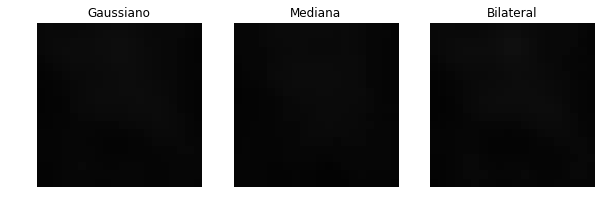

In [13]:
plt.subplot(1,3,1);
plt.imshow(Im_gauss[250:270,480:500],cmap=color_map,vmin=val_min,vmax=val_max);
plt.title("Gaussiano");
plt.axis("off");

plt.subplot(1,3,2);
plt.imshow(Im_mediana[250:270,480:500],cmap=color_map,vmin=val_min,vmax=val_max);
plt.title("Mediana");
plt.axis("off");

plt.subplot(1,3,3);
plt.imshow(Im_bilateral[250:270,480:500],cmap=color_map,vmin=val_min,vmax=val_max);
plt.title("Bilateral");
plt.axis("off");

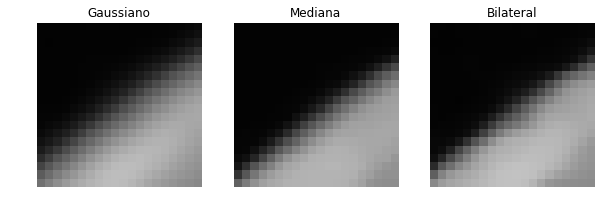

In [14]:
plt.subplot(1,3,1);
plt.imshow(Im_gauss[45:65,140:160],cmap=color_map,vmin=val_min,vmax=val_max);
plt.title("Gaussiano");
plt.axis("off");

plt.subplot(1,3,2);
plt.imshow(Im_mediana[45:65,140:160],cmap=color_map,vmin=val_min,vmax=val_max);
plt.title("Mediana");
plt.axis("off");

plt.subplot(1,3,3);
plt.imshow(Im_bilateral[45:65,140:160],cmap=color_map,vmin=val_min,vmax=val_max);
plt.title("Bilateral");
plt.axis("off");

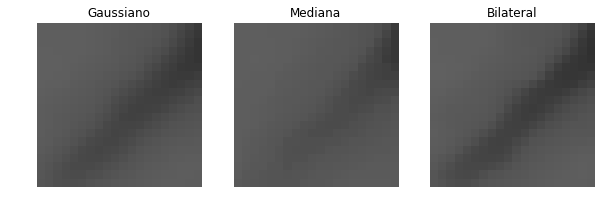

In [15]:
plt.subplot(1,3,1);
plt.imshow(Im_gauss[105:125,325:345],cmap=color_map,vmin=val_min,vmax=val_max);
plt.title("Gaussiano");
plt.axis("off");

plt.subplot(1,3,2);
plt.imshow(Im_mediana[105:125,325:345],cmap=color_map,vmin=val_min,vmax=val_max);
plt.title("Mediana");
plt.axis("off");

plt.subplot(1,3,3);
plt.imshow(Im_bilateral[105:125,325:345],cmap=color_map,vmin=val_min,vmax=val_max);
plt.title("Bilateral");
plt.axis("off");

Como pode ser visto pelos resultados, todos os filtros tornaram as regiões homogêneas (tanto a clara quanto a escura) mais uniformes do que o que se tinha na imagem original. Na interface entre região clara e escura o filtro gaussiano se destacou negativamente, por borrar a borda e fazer com que ela se tornasse menos definida, o que não ocorreu para os outros dois filtros. Por fim, na área onde há uma linha em uma região homogênea o filtro de mediana se destacou negativamente, por fazer com que a linha fosse quase apagada da região, o que ocorreu menos com o filtro gaussiano e menos ainda com o bilateral.

Dessa forma, o filtro que promoveu o melhor resultado foi o bilateral, já que tornou regiões homogêneas mais uniformes, não borrou as bordas tanto quanto os outros, e foi o que melhor conservou as linhas da figura em regiões homogêneas.

Uma segunda forma de analisar a performance do filtro é plotando os valores de intensidade de uma linha da imagem que transiciona entre uma região clara e escura, o que é feito a seguir.

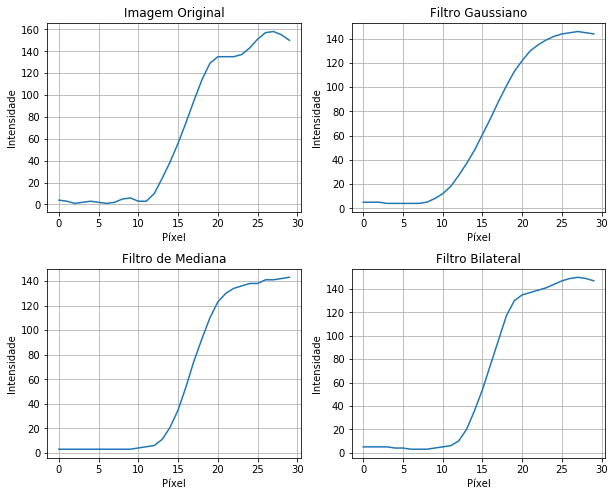

In [16]:
plt.subplots_adjust(hspace=0.3)
plt.subplot(2,2,1)
plt.plot(Im[55,135:165])
plt.title("Imagem Original")
plt.grid()
plt.xlabel("Píxel")
plt.ylabel("Intensidade")

plt.subplot(2,2,2)
plt.plot(Im_gauss[55,135:165])
plt.title("Filtro Gaussiano")
plt.grid()
plt.xlabel("Píxel")
plt.ylabel("Intensidade")

plt.subplot(2,2,3)
plt.plot(Im_mediana[55,135:165])
plt.title("Filtro de Mediana")
plt.grid()
plt.xlabel("Píxel")
plt.ylabel("Intensidade")

plt.subplot(2,2,4)
plt.plot(Im_bilateral[55,135:165])
plt.title("Filtro Bilateral")
plt.grid()
plt.xlabel("Píxel")
plt.ylabel("Intensidade");

Como pode ser visto, o trecho plotado transiciona de uma região de valor próximo a zero para uma região de valor próximo a 140. Na imagem original, esses dois patamares possuem algumas oscliações que são provenientes do ruído existente na figura. Com a aplicação dos filtros essas regiões se tornam mais planas, mostrando como o ruído é removido, deixando as regiões mais uniformes. 

No caso do filtro gaussiano, podemos notar que a transição entre as regiões se torna menos íngrime, o que corresponde ao efeito observado anteriormente onde há uma menor nitidez na borda entre uma região clara e uma escura. O mesmo não ocorre no filtro de mediana e no bilateral, que apresentaram uma inclinação parecida na região de transição.

# Filtragem no Domínio da Frequência

## Filtros Sobel e Passa Baixa ideal <a name="ex3"></a>


Iremos agora aplicar filtros no domínio da frequência na mesma imagem utilizada na sessão anterior. Para isso, primeiro precisamos obter a transformada de Fourier (FFT) da imagem.

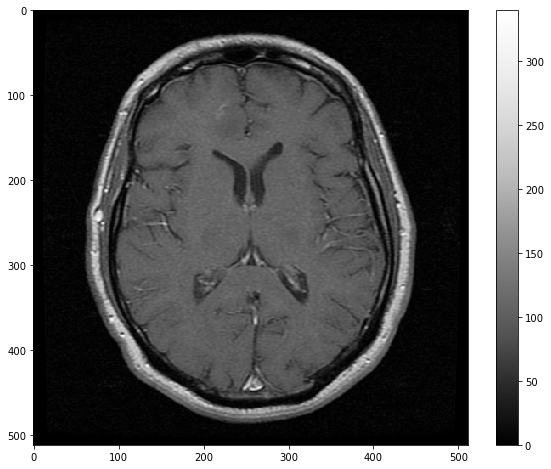

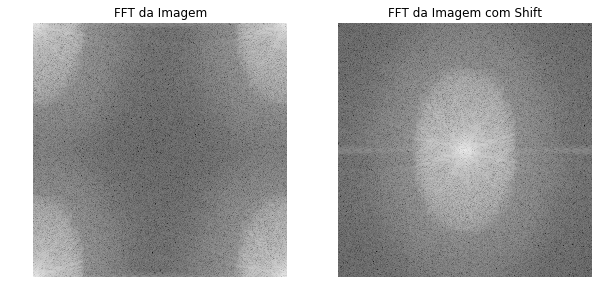

In [17]:
path="Brain_MRI/1-13.dcm"
Im=pdc.dcmread(path)
Im=Im.pixel_array

plt.imshow(Im,cmap=color_map)
plt.colorbar()
plt.show()

If = np.fft.fft2(Im)
Ifmag = 20*np.log(np.abs(If))

If_shift = np.fft.fftshift(If)
Ifmag_shift = 20*np.log(np.abs(If_shift))

plt.subplot(121)
plt.imshow(Ifmag,cmap="Greys_r")
plt.title("FFT da Imagem")
plt.axis("off")

plt.subplot(122)
plt.imshow(Ifmag_shift,cmap="Greys_r")
plt.title("FFT da Imagem com Shift")
plt.axis("off");

Em seguida, é necessário encontrar o espectro do filtro Sobel.

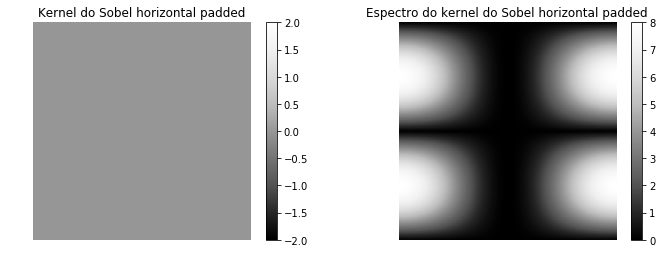

In [18]:
# Criar uma matriz padded com as dimensões da imagem para colocar o kernel espacial do Sobel horizontal
row, column = If.shape 
I_sobel_h = np.zeros((row,column))
I_sobel_h[0,0:3]=[-1,-2,-1]
I_sobel_h[2,0:3]=[1,2,1]

# Calcular a FFT do kernel do Sobel
If_sobel_h = np.fft.fft2(I_sobel_h)
Ifmag_sobel_h = np.abs(If_sobel_h)

plt.rcParams['figure.figsize'] = [12, 4]

plt.subplot(121)
plt.imshow(I_sobel_h,cmap="Greys_r")
plt.axis("off")
plt.title("Kernel do Sobel horizontal padded")
plt.colorbar()

plt.subplot(122)
plt.imshow(Ifmag_sobel_h,cmap="Greys_r")
plt.axis("off")
plt.title("Espectro do kernel do Sobel horizontal padded")
plt.colorbar();

A aplicação do filtro na imagem pode ser feita multiplicando elemento a elemento o espectro do kernel e a imagem, a imagem filtrada pode ser obtida pela transformada inversa de Fourier do resultado.

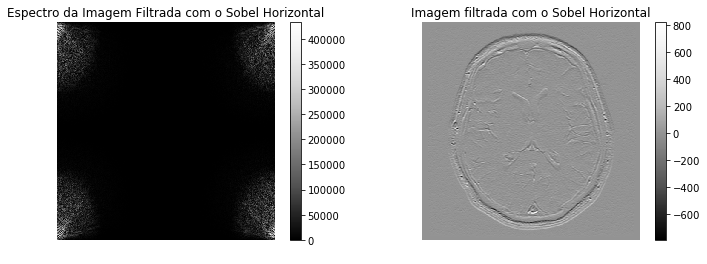

In [19]:
# Filtrar a imagem
Im_sobel_h = If_sobel_h*If
Im_mag_sobel_h = np.abs(Im_sobel_h)

plt.subplot(121)
plt.imshow(Im_mag_sobel_h,cmap="Greys_r")
plt.axis("off")
plt.title("Espectro da Imagem Filtrada com o Sobel Horizontal")
plt.colorbar()

# Obter a imagem filtrada no domínio do espaço
Im_filtered_h = np.real(np.fft.ifft2(Im_sobel_h))

plt.subplot(122)
plt.imshow(Im_filtered_h,cmap="Greys_r")
plt.axis("off")
plt.title("Imagem filtrada com o Sobel Horizontal")
plt.colorbar();

Como pode ser visto, as bordas horizontais da imagem foram realçadas, com um relevo maior podendo ser percebido na parte posterior e anterior da cabeça, onde temos uma linhas horizontais. De forma análoga, o filtro para detecção de bordas verticais pode ser implementado:

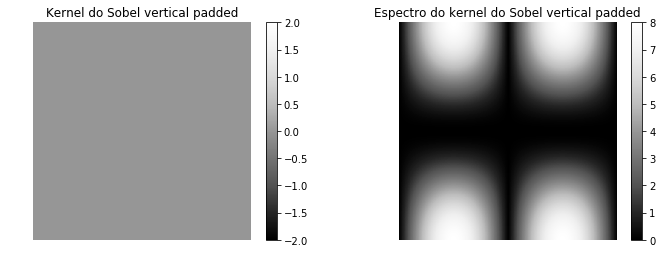

In [20]:
# Criar uma matriz padded com as dimensões da imagem para colocar o kernel espacial do Sobel vertical
I_sobel_v = np.zeros((row,column))
I_sobel_v[0:3,0]=[-1,-2,-1]
I_sobel_v[0:3,2]=[1,2,1]

# Calcular a FFT do kernel do Sobel
If_sobel_v = np.fft.fft2(I_sobel_v)
Ifmag_sobel_v = np.abs(If_sobel_v)

plt.rcParams['figure.figsize'] = [12, 4]

plt.subplot(121)
plt.imshow(I_sobel_v,cmap="Greys_r")
plt.axis("off")
plt.title("Kernel do Sobel vertical padded")
plt.colorbar()

plt.subplot(122)
plt.imshow(Ifmag_sobel_v,cmap="Greys_r")
plt.axis("off")
plt.title("Espectro do kernel do Sobel vertical padded")
plt.colorbar();

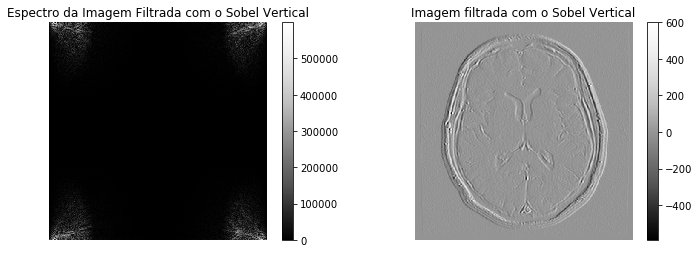

In [21]:
# Filtrar a imagem
Im_sobel_v = If_sobel_v*If
Im_mag_sobel_v = np.abs(Im_sobel_v)

plt.subplot(121)
plt.imshow(Im_mag_sobel_v,cmap="Greys_r")
plt.axis("off")
plt.title("Espectro da Imagem Filtrada com o Sobel Vertical")
plt.colorbar()

# Obter a imagem filtrada no domínio do espaço
Im_filtered_v = np.real(np.fft.ifft2(Im_sobel_v))

plt.subplot(122)
plt.imshow(Im_filtered_v,cmap="Greys_r")
plt.axis("off")
plt.title("Imagem filtrada com o Sobel Vertical")
plt.colorbar();

Como pode ser visto, nesse caso as laterais da cabeça são mais realçadas, já que representam linhas verticais na imagem. 

Regiões ampliadas do filtro horizontal e vertical são apresentadas abaixo, mostrando a borda da cabeça com o background da imagem.

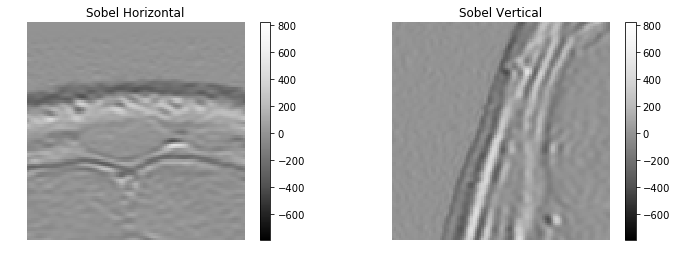

In [22]:
val_max=np.max([Im_filtered_h,Im_filtered_v])
val_min=np.min([Im_filtered_h,Im_filtered_v])

plt.subplot(1,2,1);
plt.imshow(Im_filtered_h[0:100,200:300],cmap=color_map,vmin=val_min,vmax=val_max);
plt.title("Sobel Horizontal");
plt.colorbar()
plt.axis("off");

plt.subplot(1,2,2);
plt.imshow(Im_filtered_v[100:200,50:150],cmap=color_map,vmin=val_min,vmax=val_max);
plt.title("Sobel Vertical");
plt.colorbar()
plt.axis("off");

Podemos pegar uma coluna ou linha dessas regiões para observar como os valores variam:

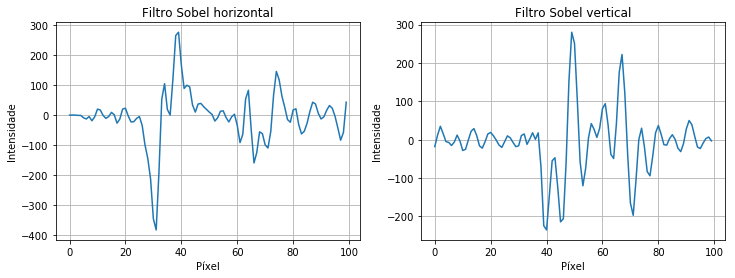

In [23]:
plt.subplot(1,2,1)
plt.plot(Im_filtered_h[0:100,250])
plt.title("Filtro Sobel horizontal")
plt.grid()
plt.xlabel("Píxel")
plt.ylabel("Intensidade")

plt.subplot(1,2,2)
plt.plot(Im_filtered_v[150,50:150])
plt.title("Filtro Sobel vertical")
plt.grid()
plt.xlabel("Píxel")
plt.ylabel("Intensidade");

Como pode ser visto pelos resultados, em regiões homogêneas a imagem filtrada possui valores oscilando em torno de zero, enquanto em regiões de borda há uma variação primeiro para um valor negativo (menor do que -200) e em seguida para um valor positivo (maior que 200).

Para a aplicação do filtro passa baixa ideal, as seguintes funções foram utilizadas, baseadas ou obtidas das apresentadas no jupyter notebook da aula:

In [24]:
def create_uv2(MN):
    lower = np.arange(np.int(np.floor(-MN/2))+1, 0)
    upper = np.arange(0,np.int(np.floor(MN/2))+1)
    return( np.concatenate((upper,lower) ))

def fftLFilt (centre ,U ,V , It , radius):
    # Only difference is  Change < radius**2 for > radius**2
    mask = (U - centre [0] )**2 + (V - centre [1] )**2 < radius**2

    J = It * mask
    
    #take real part, since the array can contain small imaginary values due to numerical precision
    j = np.real(np.fft.ifft2(J)) 
    
    plt.figure(figsize=(15,4))
    
    plt.subplot(121),plt.imshow(mask,cmap='Greys_r')
    plt.title(f'Máscara (FPB Ideal) raio={radius} centro: ({centre[0]}, {centre[1]})'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(j, cmap = 'Greys_r')
    plt.title(f"Imagem filtrada"), plt.xticks([]), plt.yticks([])
    plt.show()
    return j

Com elas, filtros passa baixa ideais foram criados e aplicados no espectro da imagem:

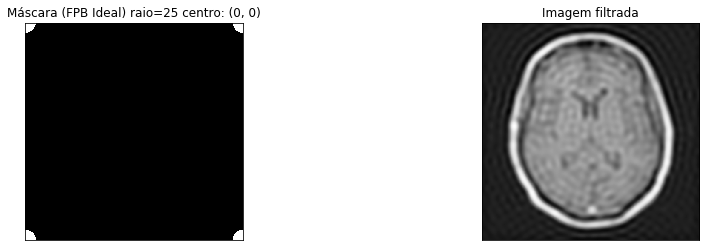

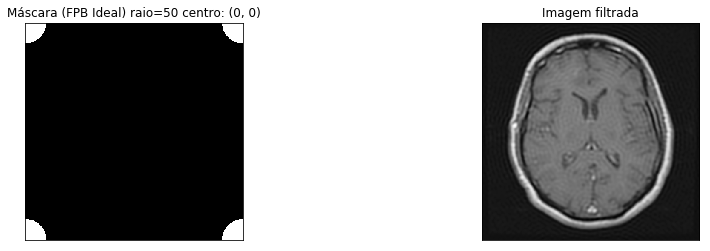

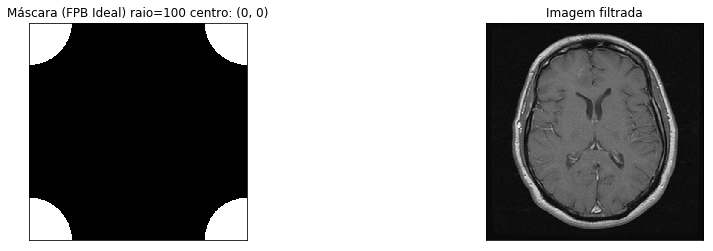

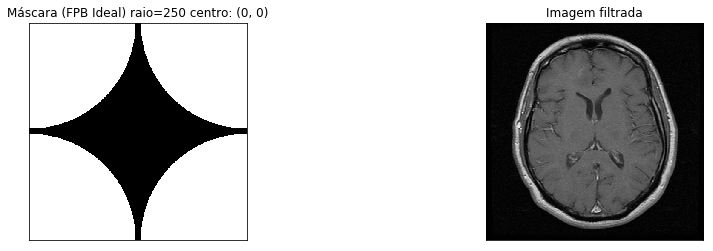

In [25]:
# Criar grid para a criação da máscara do filtro
u = create_uv2(row)
v = create_uv2(column)

U, V = np.meshgrid(u, v)
Im_FPB=[]

for r in [25,50,100,250]:
    Im_FPB.append(fftLFilt([0,0],U,V,If,r))

Como pode ser visto nos resultados, quando o raio do filtro é pequeno ocorre um efeito de rigging na imagem, que tende a diminuir quanto maior é o raio utilizado.

Um trecho de uma coluna dessas imagens onde há uma borda entre a região de background e a cabeça foi selecionado e é apresentado abaixo:

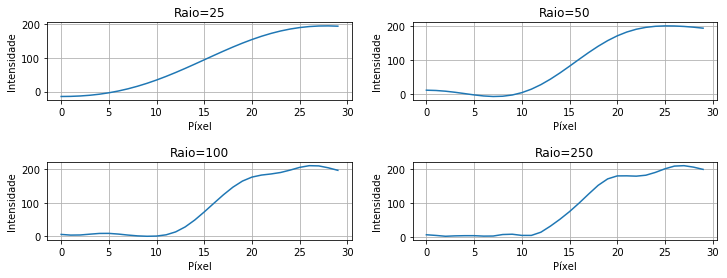

In [26]:
plt.subplots_adjust(hspace=0.8)
plt.subplot(2,2,1)
plt.plot(Im_FPB[0][55,135:165])
plt.title("Raio=25")
plt.grid()
plt.xlabel("Píxel")
plt.ylabel("Intensidade")

plt.subplot(2,2,2)
plt.plot(Im_FPB[1][55,135:165])
plt.title("Raio=50")
plt.grid()
plt.xlabel("Píxel")
plt.ylabel("Intensidade")

plt.subplot(2,2,3)
plt.plot(Im_FPB[2][55,135:165])
plt.title("Raio=100")
plt.grid()
plt.xlabel("Píxel")
plt.ylabel("Intensidade")

plt.subplot(2,2,4)
plt.plot(Im_FPB[3][55,135:165])
plt.title("Raio=250")
plt.grid()
plt.xlabel("Píxel")
plt.ylabel("Intensidade");

Como pode ser visto, o trecho selecionado consiste de duas regiões homogêneas (uma com valores próximos de 0 e outra com valores próximos de 200) e uma região de transição entre elas. Quanto menor o raio do filtro, mais uniforme é a região homogênea, mostrando a remoção do ruído, porém a região de transição se torna menos íngreme, o que indica uma perda de nitidez da borda. Em contrapartida, com o aumento do raio do filtro a região de transição se torna mais inclinada, o que se traduz em bordas mais definidas na imagem, porém algumas osclições podem ser vistas nas regiões homogêneas.

Portanto, deve ser escolhido um valor adequado que resulte na remoção do ruído sem prejudicar tanto a definição das bordas da imagem.

## Filtragem de uma Imagem de Escolha <a name="ex4"></a>

Para a realização desta atividade, foi escolhida uma imagem do [músculo esquelético da língua de um macaco](https://www.allposters.com/-sp/Skeletal-Muscle-Peripheral-Nuclei-and-Cross-Striations-from-a-Monkey-Tongue-Macaca-LM-Posters_i9012571_.htm). A imagem e sua FFT são apresentadas abaixo.

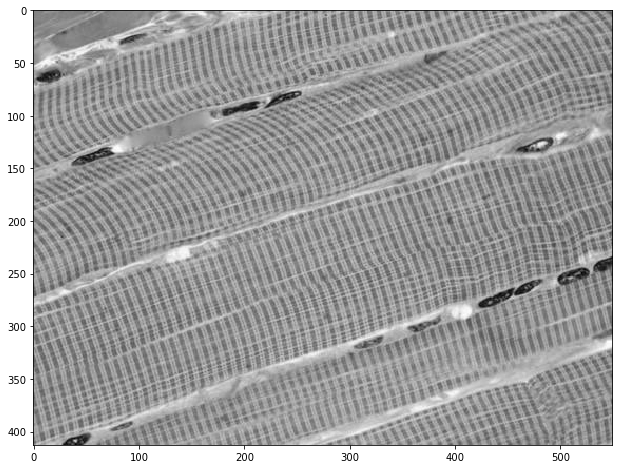

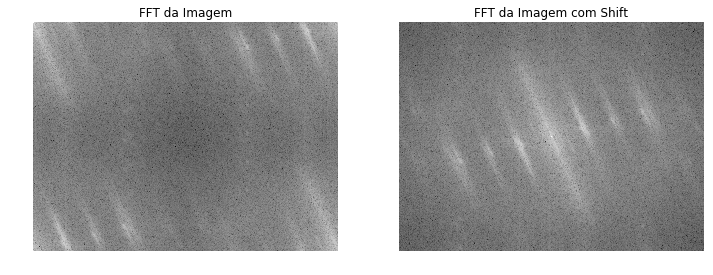

In [28]:
import imageio
from skimage.color import rgb2gray

im=imageio.imread('muscle.jpg')

im=rgb2gray(im)
plt.imshow(im,cmap='gray')
plt.show()

I = np.fft.fft2(im)
I_mag = 20*np.log(np.abs(I))

Ishift = np.fft.fftshift(I)
Ishift_mag = 20*np.log(np.abs(Ishift))

plt.rcParams['figure.figsize'] = [12, 8]
plt.subplot(121)
plt.imshow(I_mag,cmap="Greys_r")
plt.title("FFT da Imagem")
plt.axis("off")

plt.subplot(122)
plt.imshow(Ishift_mag,cmap="Greys_r")
plt.title("FFT da Imagem com Shift")
plt.axis("off");

Como pode ser visto, é possível notar no espectro da imagem regiões mais claras com um espaçamento constante, que provém do padrão presente na imagem. Interessante notar também que essas regiões possuem uma inclinação parecida com a das linhas do padrão da imagem.

Iremos filtrar essa imagem com o filtro passa baixa ideal de raio 100 utilizado na sessão anterior e verificar o seu efeito.

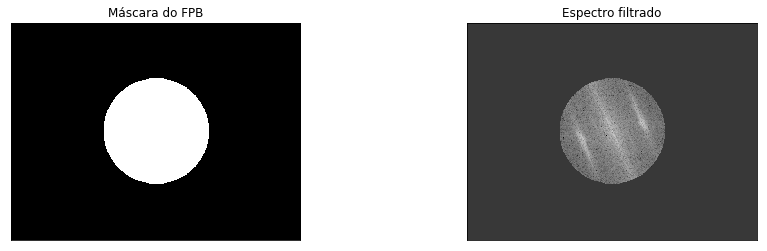

In [29]:
# Criar grid para a criação da máscara do filtro
row, column = I.shape
u = create_uv2(column)
v = create_uv2(row)

U, V = np.meshgrid(u, v)
radius=100

mask = (U)**2 + (V)**2 < radius**2

J = I*mask
J_shift=np.fft.fftshift(np.abs(J))

#take real part, since the array can contain small imaginary values due to numerical precision
j = np.real(np.fft.ifft2(J)) 

plt.figure(figsize=(15,4))

plt.subplot(121),plt.imshow(np.fft.fftshift(mask),cmap='Greys_r')
plt.title('Máscara do FPB'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(20*np.log(J_shift,out=np.zeros_like(J_shift), where=(J_shift!=0)), cmap = 'Greys_r')
plt.title("Espectro filtrado"), plt.xticks([]), plt.yticks([]);

Como pode ser visto pelos resultados, o efeito do filtro é o de eliminar frequências mais altas da imagem. Isso pode eliminar ruídos de alta frequência, porém também pode prejudicar a imagem, já que partes do padrão que tinhamos observado no espectro anterior foram eliminadas. Para investigar isso, vamos comparar a imagem original e a filtrada abaixo.

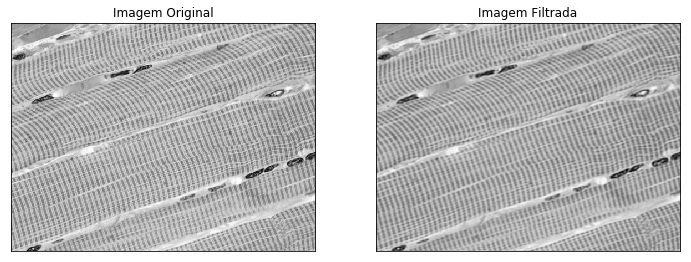

In [30]:
plt.subplot(121),plt.imshow(im, cmap = 'Greys_r')
plt.title("Imagem Original"), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(j, cmap = 'Greys_r')
plt.title("Imagem Filtrada"), plt.xticks([]), plt.yticks([])
plt.show()

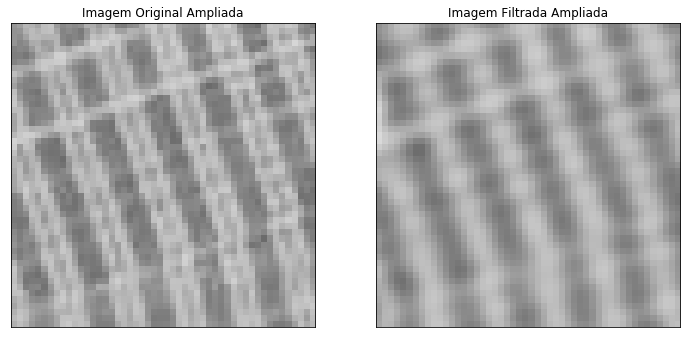

In [31]:
val_max=np.max([im,j])
val_min=np.min([im,j])

plt.subplot(121),plt.imshow(im[300:350,0:50],vmax=val_max, vmin=val_min, cmap = 'Greys_r')
plt.title("Imagem Original Ampliada"), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(j[300:350,0:50],vmax=val_max, vmin=val_min, cmap = 'Greys_r')
plt.title("Imagem Filtrada Ampliada"), plt.xticks([]), plt.yticks([])
plt.show()

Como pode ser visto nas imagens ampliada, há uma perda da definição das bordas dos padrões, enquanto as regiões do interior se tornaram mais homogêneas. Podemos também selecionar uma linha dessa região ampliada para observar:

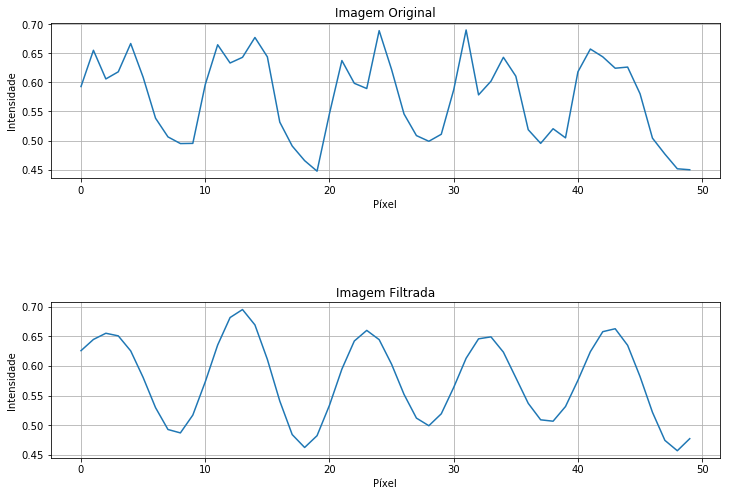

In [32]:
plt.subplots_adjust(hspace=0.8)
plt.subplot(2,1,1)
plt.plot(im[325,0:50])
plt.title("Imagem Original")
plt.grid()
plt.xlabel("Píxel")
plt.ylabel("Intensidade")

plt.subplot(2,1,2)
plt.plot(j[325,0:50])
plt.title("Imagem Filtrada")
plt.grid()
plt.xlabel("Píxel")
plt.ylabel("Intensidade");

Novamente, o efeito abordado anteriormente pode ser visualizado: regiões homogêneas com valores menos oscilantes e transições entre as regiões sendo menos inclinadas.

Por fim, vamos observar a diferença entre a imagem original e a filtrada.

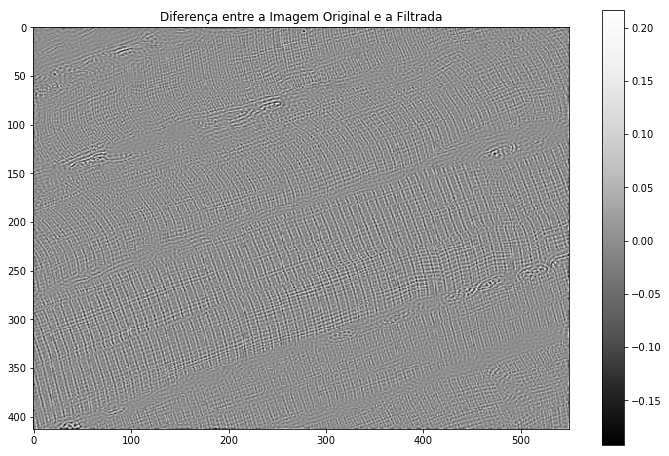

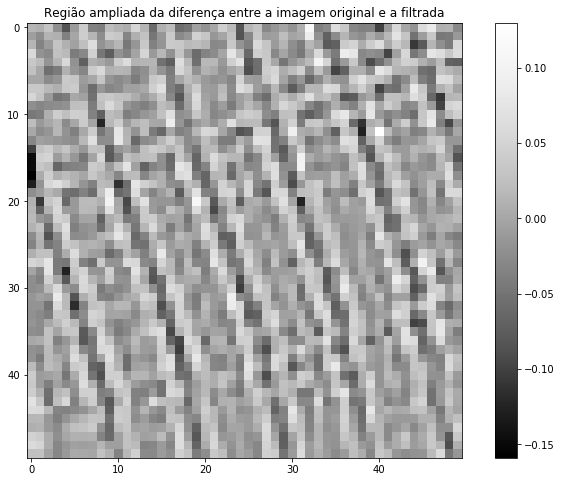

In [34]:
plt.imshow(im-j,cmap="Greys_r")
plt.colorbar()
plt.title("Diferença entre a Imagem Original e a Filtrada")
plt.show()

plt.imshow((im-j)[300:350,0:50],cmap="Greys_r")
plt.colorbar()
plt.title("Região ampliada da diferença entre a imagem original e a filtrada")
plt.show();

Pode-se ver claramente que uma diferença principal entre a imagem original e a filtrada ocorre nas bordas dos padrões. Isso era esperado, uma vez que regiões de transição significam uma mudança de valores rápida na imagem, o que se traduz em uma frequência espacial alta. Dessa forma, quando aplicamos um filtro passa baixa na imagem a definição dessas é prejudicada pela eliminação das frequências mais altas. 